In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in dataframe and clean
life_expect = pd.read_csv('life_expectancy.csv')
life_expect.columns= ['country', 'expect_female', 'expect_both', 'expect_male']
life_expect = life_expect[['country', 'expect_female','expect_male','expect_both']]

# spot_check
print(life_expect.describe())

       expect_female  expect_male  expect_both
count     200.000000   200.000000   200.000000
mean       76.776900    71.517200    74.133700
std         8.820332     8.419633     8.571318
min        54.940000    53.360000    54.640000
25%        71.300000    66.270000    68.732500
50%        77.955000    71.250000    74.700000
75%        81.985000    76.565000    79.062500
max       149.220000   137.640000   143.280000


In [3]:
# since there are 200 entries, I found a dataframe that assigns a continent. Merge and sift by continent
country_continent = pd.read_csv('Countries-Continents.csv')

# clean for merging
country_continent.columns = ['continent','country']
country_continent = country_continent[['country','continent']]

# merge df's
life_expect_continent = pd.merge(life_expect, country_continent, on='country')

# reorganize for readability
life_expect_continent = life_expect_continent[['continent','country','expect_female','expect_male','expect_both']]

# spot_check
# print(life_expect_continent.head())

In [4]:
# first, create a dataframe that averages life expectancies by country
continent_average_expect = life_expect_continent.groupby('continent').aggregate({'expect_female':'mean','expect_male':'mean','expect_both':'mean'})

# continent list for easier reference later:
continent_list = continent_average_expect.index

# spot check
print(continent_average_expect)

               expect_female  expect_male  expect_both
continent                                             
Africa             67.853333    63.396875    65.610208
Asia               77.903077    73.156923    75.485897
Europe             82.585500    76.826500    79.755500
North America      77.915263    72.104211    75.010526
Oceania            82.268000    77.293000    79.716000
South America      78.483333    72.568333    75.509167


In [5]:
# function for wraping text of labels
def wrap_label(lst):
    x_labels = []
    for l in lst:
        if ' ' in l:
            x_labels.append(l.replace(' ','\n'))
        else:
            x_labels.append(l)
    return x_labels

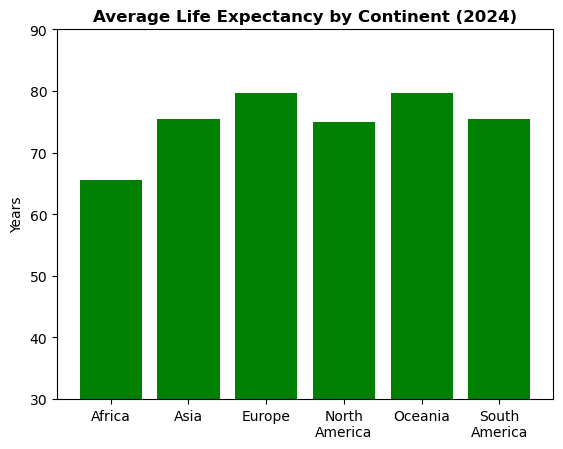

<Figure size 640x480 with 0 Axes>

In [6]:
# now create bar graphs to compare average life expectancy across countries
ax = plt.subplot()
plt.bar(continent_list,continent_average_expect['expect_both'], color='green')

# y-axis
plt.ylabel('Years')
plt.ylim(30,90)

# x-axis
ax.set_xticks(range(len(continent_list)))        
ax.set_xticklabels(wrap_label(continent_list))

# final touches
plt.title('Average Life Expectancy by Continent (2024)', fontweight='bold')
plt.savefig('continent_average_life_expectancy.jpg')
plt.show()
plt.clf()

In [7]:
# side-by-side bar graph for female and male data function
age_range = range(30,91,10)

def side_by_side_bar_2(side,df,x_list,fem_col,fem_label,fem_color,mal_col,mal_label,mal_color):
    # x values for females and male bar graph to plot on then x ticks for labels
    female_x = [2*e + .8*1 for e in range(len(x_list))]
    male_x = [2*e + .8*2 for e in range(len(x_list))]
    label_x = [(a+b)/2 for a,b in zip(female_x,male_x)]

    # initialize and plot the bar graphs
    if side == 2:
        ax = plt.subplot(1,2,side)
    else:
        ax = plt.subplot()
    plt.bar(female_x, df[fem_col], color=fem_color, label = fem_label)
    plt.bar(male_x, df[mal_col], color=mal_color, label = mal_label)
    
    # x-axis
    ax.set_xticks(label_x)
    ax.set_xticklabels(wrap_label(x_list))
    
    # y-axis
    plt.ylim(30,90)
    ax.set_yticks(age_range)
    plt.ylabel('Years')
    
    # finalize
    plt.legend()
    plt.title('Average Life Expectancy by Sex (2024)', fontweight='bold')
    plt.tight_layout()
    plt.show()
    

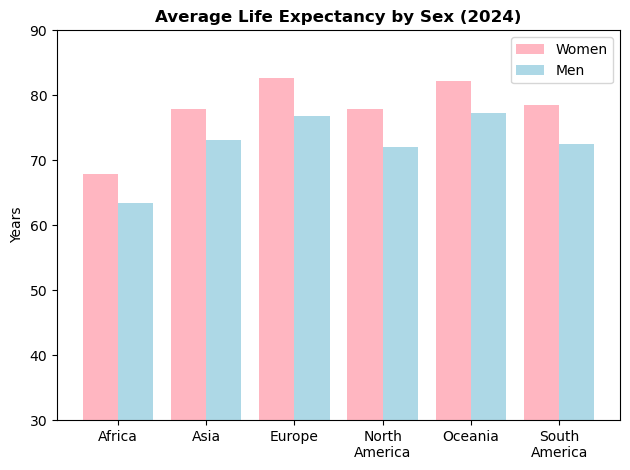

<Figure size 640x480 with 0 Axes>

In [8]:
# side_by_side_bar_2(df,x_list,fem_col,fem_label,fem_color,mal_col,mal_label,mal_color):

side_by_side_bar_2(1,continent_average_expect,continent_list,'expect_female','Women','lightpink','expect_male','Men','lightblue')
plt.savefig('continent_sex_life_expectancy.jpg')
plt.clf()

In [9]:
# appendix: maybe graph top and bottom life expectancies by continent
def country_continent_expect(continent, fem_label, fem_color, mal_label, mal_color, rank):
    #create segregated dataframe and country list
    df = life_expect_continent[life_expect_continent['continent'] == continent]
    
    
    df = df.sort_values(by = 'expect_both', ascending=False)
    
    #truncating to top x  for load and visual
    #use with care
    df = df[:rank]
    
    x_list = df['country']
    
    #plot both
    ax = plt.subplot(1,2,1)
    plt.bar(x_list, df['expect_both'])
    plt.title(continent + " Top 5 Countries (2024)".title(), fontweight='bold')
    
    #y-axis
    plt.ylim(30,90)
    ax.set_yticks(age_range)
    plt.ylabel('Years (Averaged)')
    
    #x-axis
    ax.set_xticks(range(len(x_list)))
    ax.set_xticklabels(wrap_label(x_list))
    plt.xlabel('Countries')  
    
    #plot female_male
    side_by_side_bar_2(2,df,x_list,'expect_female', fem_label, fem_color, 'expect_male', mal_label, mal_color)
    

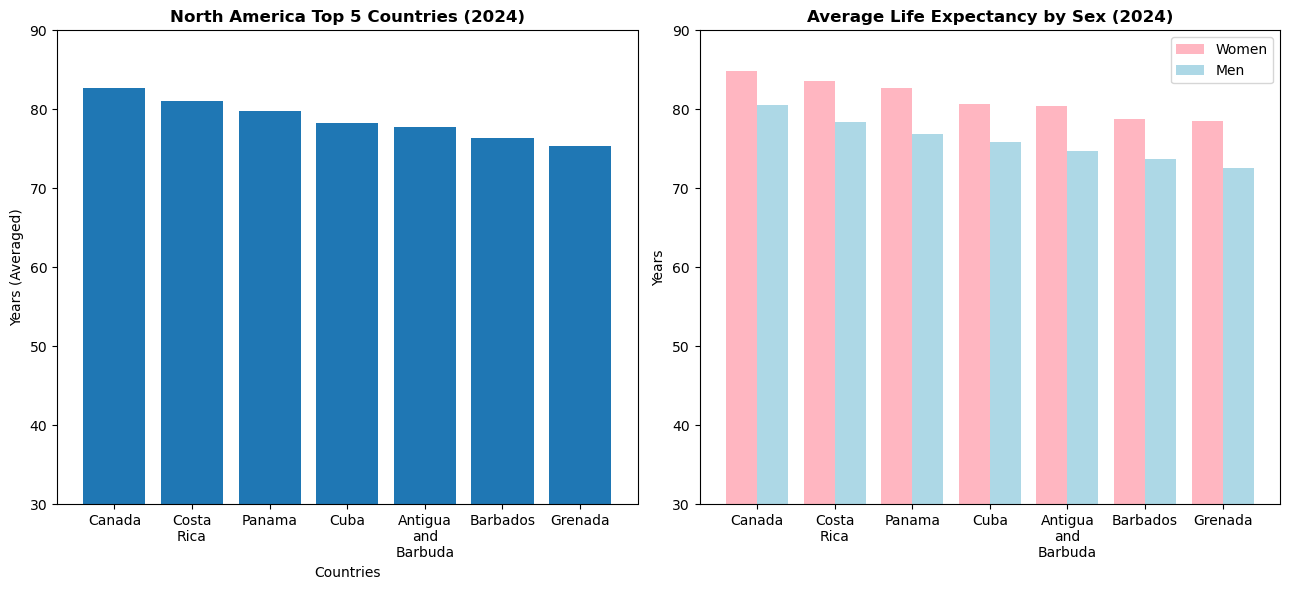

<Figure size 640x480 with 0 Axes>

In [10]:
# adust figsize (width,height) to size the plot
plt.figure(figsize=(13,6))

# proof of concept and spot check
country_continent_expect('North America', 'Women', 'lightpink', 'Men', 'lightblue',7)
plt.savefig('north_america_average_report')
plt.clf()